## ACTD 2024 - 20

### Clases 11-12: Introducción a redes neuronales

- Redes densas
- Redes para regresión
- Funciones de activación y pérdida

Empecemos importando numpy y pandas

In [2]:
import numpy as np
import pandas as pd

Carguemos el archivo auto-mpg.data (disponible en Bloque Neón) usando pandas. Note que debemos incluir los nombres de las columnas, además de indicar los caracteres para separación, nas y comentarios.

In [3]:
df = pd.read_csv('auto-mpg.data',
                 names=['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight',
                'Acceleration', 'Model Year', 'Origin'],
                 sep=' ',
                 na_values='?',
                 comment='\t',
                 skipinitialspace=True
                 )

Exploremos las primeras filas del dataframe.

In [4]:
df.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1


- MPG: miles per gallon
- Cylinders: # de cilindros
- Displacement: volumen desplazado por los pistones
- Horsepower: caballos de potencia
- Weight: peso
- Acceleration: aceleración
- Model Year: año/modelo
- Origin: 1:USA, 2:Europa, 3:Japón

Exploremos el tamaño del df

In [5]:
df.shape

(398, 8)

Identificamos NAs en los datos

In [6]:
df.isna().sum()

MPG             0
Cylinders       0
Displacement    0
Horsepower      6
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64

In [7]:
df.dropna(inplace=True)

In [8]:
df.shape

(392, 8)

Codifiquemos la variable categórica Origin

In [9]:
df['Origin'].map({1: 'USA', 2: 'Europe', 3: 'Japan'})

0         USA
1         USA
2         USA
3         USA
4         USA
        ...  
393       USA
394    Europe
395       USA
396       USA
397       USA
Name: Origin, Length: 392, dtype: object

In [10]:
df['Origin'] = df['Origin'].map({1: 'USA', 2: 'Europe', 3: 'Japan'})

In [11]:
df.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,USA
1,15.0,8,350.0,165.0,3693.0,11.5,70,USA
2,18.0,8,318.0,150.0,3436.0,11.0,70,USA
3,16.0,8,304.0,150.0,3433.0,12.0,70,USA
4,17.0,8,302.0,140.0,3449.0,10.5,70,USA


In [12]:
pd.get_dummies(df, columns=['Origin'], prefix='', prefix_sep='')

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Europe,Japan,USA
0,18.0,8,307.0,130.0,3504.0,12.0,70,False,False,True
1,15.0,8,350.0,165.0,3693.0,11.5,70,False,False,True
2,18.0,8,318.0,150.0,3436.0,11.0,70,False,False,True
3,16.0,8,304.0,150.0,3433.0,12.0,70,False,False,True
4,17.0,8,302.0,140.0,3449.0,10.5,70,False,False,True
...,...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790.0,15.6,82,False,False,True
394,44.0,4,97.0,52.0,2130.0,24.6,82,True,False,False
395,32.0,4,135.0,84.0,2295.0,11.6,82,False,False,True
396,28.0,4,120.0,79.0,2625.0,18.6,82,False,False,True


In [13]:
df = pd.get_dummies(df, columns=['Origin'], prefix='', prefix_sep='', dtype=int)

In [14]:
df.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Europe,Japan,USA
0,18.0,8,307.0,130.0,3504.0,12.0,70,0,0,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,0,0,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,0,0,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,0,0,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,0,0,1


Separamos los datos en entrenamiento y prueba

In [15]:
train = df.sample(frac=0.8, random_state=100)
train.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Europe,Japan,USA
125,20.0,6,198.0,95.0,3102.0,16.5,74,0,0,1
142,26.0,4,79.0,67.0,1963.0,15.5,74,1,0,0
278,31.5,4,89.0,71.0,1990.0,14.9,78,1,0,0
254,20.2,6,200.0,85.0,2965.0,15.8,78,0,0,1
328,30.0,4,146.0,67.0,3250.0,21.8,80,1,0,0


In [16]:
test = df.drop(train.index)
test.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Europe,Japan,USA
0,18.0,8,307.0,130.0,3504.0,12.0,70,0,0,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,0,0,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,0,0,1
8,14.0,8,455.0,225.0,4425.0,10.0,70,0,0,1
13,14.0,8,455.0,225.0,3086.0,10.0,70,0,0,1


In [17]:
print(train.shape)
print(test.shape)

(314, 10)
(78, 10)


Realicemos una exploración descriptiva de los datos, calculando inicialmente estadísticas de cada variable continua

In [18]:
train.describe()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Europe,Japan,USA
count,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000
mean,23.579299,5.455414,192.562102,103.767516,2959.312102,15.518471,75.964968,0.171975,0.219745,0.608280
std,7.877216,1.691811,103.701434,38.123560,856.880939,2.705097,3.672110,0.377961,0.414735,0.488914
min,9.000000,3.000000,68.000000,46.000000,1649.000000,8.000000,70.000000,0.000000,0.000000,0.000000
25%,17.125000,4.000000,98.000000,75.000000,2193.000000,13.900000,73.000000,0.000000,0.000000,0.000000
50%,23.000000,4.000000,146.000000,94.500000,2764.500000,15.500000,76.000000,0.000000,0.000000,1.000000
75%,29.375000,8.000000,260.000000,120.000000,3612.000000,17.000000,79.000000,0.000000,0.000000,1.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,1.000000,1.000000,1.000000


Exploremos relaciones bivariadas con pairplot de seaborn

In [19]:
import seaborn as sns

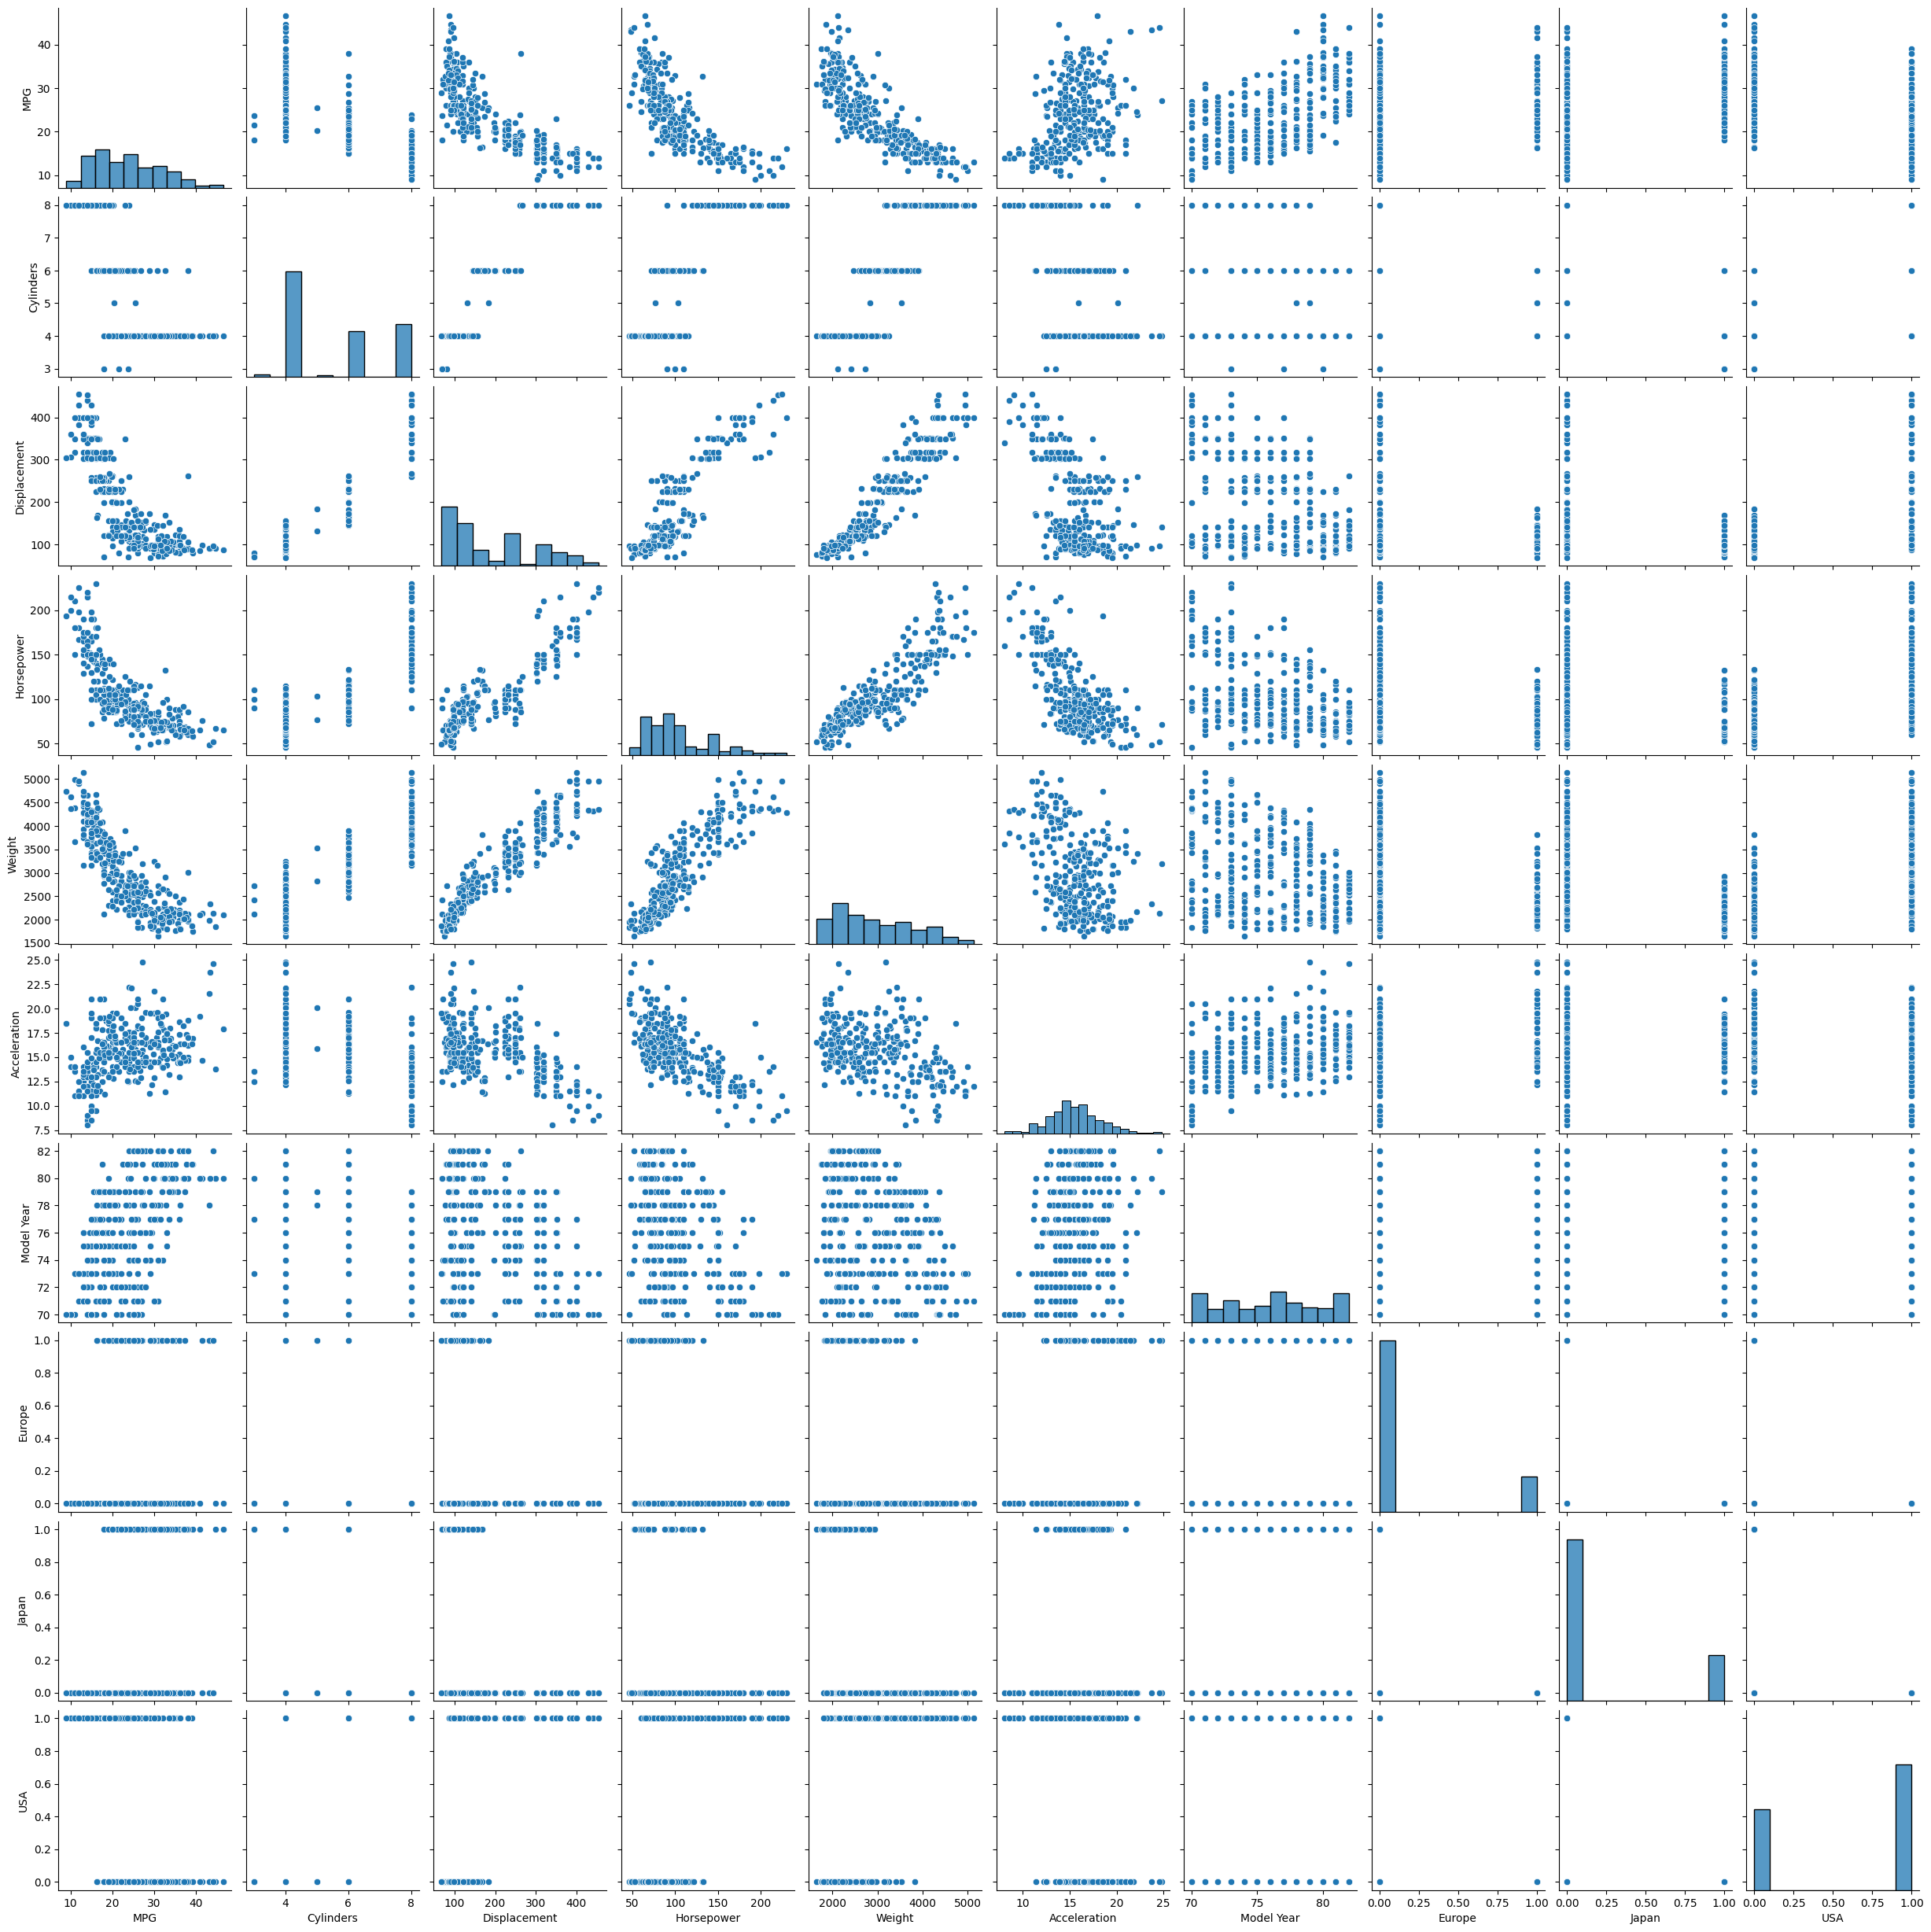

In [20]:
sns.pairplot(train)

Calculemos la matriz de correlacion

In [21]:
train.corr()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Europe,Japan,USA
MPG,1.000000,-0.777230,-0.807032,-0.775493,-0.832793,0.389422,0.596816,0.249298,0.455161,-0.578826
Cylinders,-0.777230,1.000000,0.950858,0.849237,0.901259,-0.488703,-0.330668,-0.352708,-0.416286,0.625791
Displacement,-0.807032,0.950858,1.000000,0.893640,0.941913,-0.523473,-0.364236,-0.372541,-0.455127,0.674072
Horsepower,-0.775493,0.849237,0.893640,1.000000,0.875157,-0.672989,-0.414065,-0.291224,-0.327337,0.502808
Weight,-0.832793,0.901259,0.941913,0.875157,1.000000,-0.402870,-0.318231,-0.304870,-0.454284,0.621043
Acceleration,0.389422,-0.488703,-0.523473,-0.672989,-0.402870,1.000000,0.258013,0.195310,0.110850,-0.245018
Model Year,0.596816,-0.330668,-0.364236,-0.414065,-0.318231,0.258013,1.000000,-0.062402,0.237930,-0.153590
Europe,0.249298,-0.352708,-0.372541,-0.291224,-0.304870,0.195310,-0.062402,1.000000,-0.241853,-0.567903
Japan,0.455161,-0.416286,-0.455127,-0.327337,-0.454284,0.110850,0.237930,-0.241853,1.000000,-0.661311
USA,-0.578826,0.625791,0.674072,0.502808,0.621043,-0.245018,-0.153590,-0.567903,-0.661311,1.000000


<Axes: >

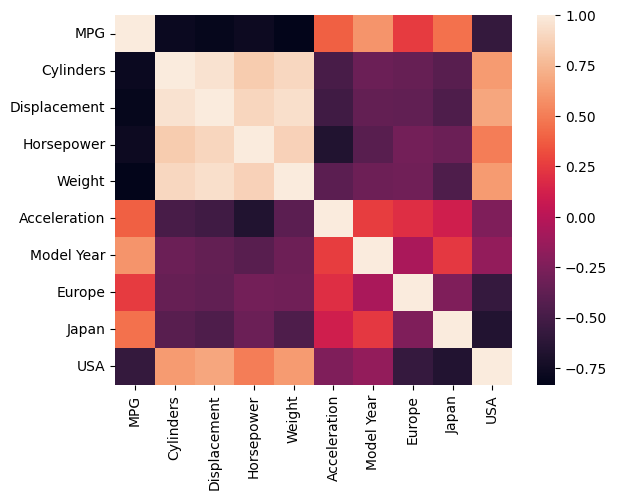

In [22]:
sns.heatmap(train.corr())

Seleccionamos ahora las características y las etiquetas (MPG)

In [23]:
train_X = train.copy()
test_X = test.copy()

In [24]:
train_y = train_X.pop('MPG')
test_y = test_X.pop('MPG')

In [25]:
train_X.head()

,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Europe,Japan,USA
125,6,198.0,95.0,3102.0,16.5,74,0,0,1
142,4,79.0,67.0,1963.0,15.5,74,1,0,0
278,4,89.0,71.0,1990.0,14.9,78,1,0,0
254,6,200.0,85.0,2965.0,15.8,78,0,0,1
328,4,146.0,67.0,3250.0,21.8,80,1,0,0


In [26]:
train_y.head()

125    20.0
142    26.0
278    31.5
254    20.2
328    30.0
Name: MPG, dtype: float64

In [27]:
train_X.dtypes

Cylinders         int64
Displacement    float64
Horsepower      float64
Weight          float64
Acceleration    float64
Model Year        int64
Europe            int32
Japan             int32
USA               int32
dtype: object

Construyamos los modelos usando tensorflow

In [28]:
import tensorflow as tf

In [29]:
tf.__version__

'2.17.0'

Capa de normalización y Variables Base

In [30]:
tf.keras.layers.Normalization

keras.src.layers.preprocessing.normalization.Normalization

In [31]:
Variables = ["Displacement", "Horsepower", "Weight", "Acceleration"]
Cantidad = len(Variables)

## Modelos Base

In [32]:
Var_Base = np.array(train_X[Variables])

In [33]:
norm_base = tf.keras.layers.Normalization(input_shape=[Cantidad,])

c:\Users\Jeronimo Vargas\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\preprocessing\tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [34]:
norm_base.adapt(Var_Base)

In [35]:
import matplotlib.pyplot as plt

In [36]:
test_res = {}

In [37]:
test_res

{}

In [38]:
modelo_base = tf.keras.Sequential([
      norm_base,
      tf.keras.layers.Dense(64, activation='relu'),
      tf.keras.layers.Dense(64, activation='relu'),
      tf.keras.layers.Dense(1)
  ])

In [39]:
modelo_base.compile(loss='mean_absolute_error',
                optimizer=tf.keras.optimizers.Adam(0.001))


In [40]:
modelo_base.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ normalization (Normalization)   │ (None, 4)              │             9 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,554 (17.79 KB)

 Trainable params: 4,545 (17.75 KB)

 Non-trainable params: 9 (40.00 B)

In [41]:
%%time
history_Base = modelo_base.fit(
    train_X[Variables],
    train_y,
    validation_split=0.2,
    epochs=100)

Epoch 1/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 23.7036 - val_loss: 21.8872
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 23.2415 - val_loss: 21.3372
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 22.4316 - val_loss: 20.7191
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 22.0034 - val_loss: 19.9602
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 20.9487 - val_loss: 18.9809
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 20.8093 - val_loss: 17.6824
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 18.9289 - val_loss: 16.0950
Epoch 8/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 16.8345 - val_loss: 14.4449
Epoch 9/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 15.5376 - val_loss: 12.8986
Epoch 10/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 13.6311 - val_loss: 11.2679
Epoch 11/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 11.6661 - val_loss: 9.3159
Epoch 12/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 9.724

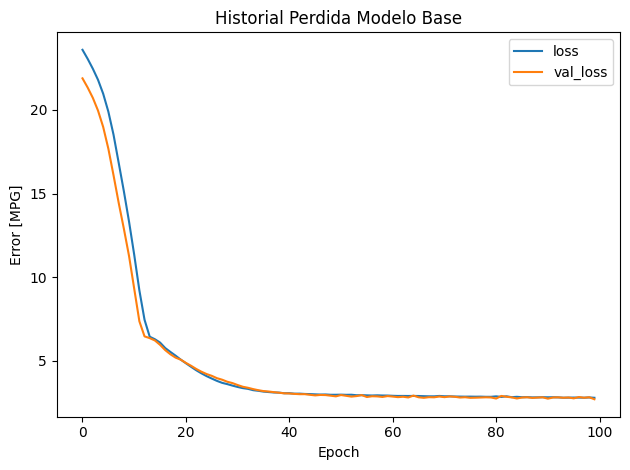

In [42]:
plt.plot(history_Base.history['loss'], label='loss')
plt.plot(history_Base.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Error [MPG]')
plt.title("Historial Perdida Modelo Base")
plt.legend()
plt.tight_layout()
plt.savefig("Perdida_Modelo_Base.png")

In [43]:
test_res['Modelo_Base'] = modelo_base.evaluate(
    test_X[Variables], test_y,
    verbose=0)

In [44]:
test_res

{'Modelo_Base': 2.6896610260009766}

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


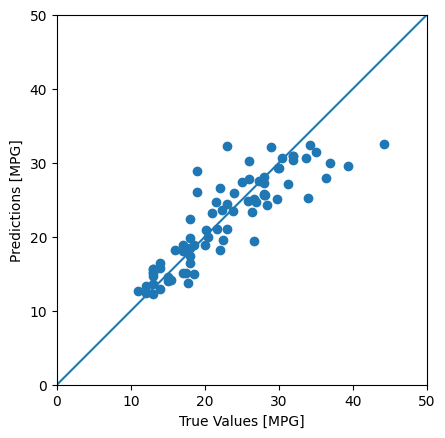

In [45]:
test_pred_base = modelo_base.predict(test_X[Variables]).flatten()

plt.axes(aspect='equal')
plt.scatter(test_y, test_pred_base)
plt.xlabel('True Values [MPG]')
plt.ylabel('Predictions [MPG]')
lims = [0, 50]
plt.xlim(lims)
plt.ylim(lims)
_=plt.plot(lims, lims)

## Modelos Distintas Neuronas

### 16 Neuronas

In [46]:
modelo_16_Neuronas = tf.keras.Sequential([
      norm_base,
      tf.keras.layers.Dense(16, activation='relu'),
      tf.keras.layers.Dense(16, activation='relu'),
      tf.keras.layers.Dense(1)
  ])

In [47]:
modelo_16_Neuronas.compile(loss='mean_absolute_error',
                optimizer=tf.keras.optimizers.Adam(0.001))

In [48]:
modelo_16_Neuronas.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ normalization (Normalization)   │ (None, 4)              │             9 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 16)             │            80 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 16)             │           272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 378 (1.48 KB)

 Trainable params: 369 (1.44 KB)

 Non-trainable params: 9 (40.00 B)

In [49]:
%%time
history_16_Neuronas = modelo_16_Neuronas.fit(
    train_X[Variables],
    train_y,
    validation_split=0.2,
    epochs=100)

Epoch 1/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 24.0754 - val_loss: 22.3011
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 23.2428 - val_loss: 22.1595
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 23.7032 - val_loss: 22.0232
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 23.6084 - val_loss: 21.8788
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 23.6502 - val_loss: 21.7230
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 22.8873 - val_loss: 21.5505
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 22.9273 - val_loss: 21.3570
Epoch 8/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 22.8136 - val_loss: 21.1416
Epoch 9/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 22.3774 - val_loss: 20.8958
Epoch 10/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 22.3199 - val_loss: 20.6094
Epoch 11/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 21.7650 - val_loss: 20.2736
Epoch 12/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 21.1

In [50]:
test_res['Modelo_16_Neuronas'] = modelo_16_Neuronas.evaluate(
    test_X[Variables], test_y,
    verbose=0)

In [51]:
test_res

{'Modelo_Base': 2.6896610260009766, 'Modelo_16_Neuronas': 2.9003961086273193}

### 32 Neuronas

In [52]:
modelo_32_Neuronas = tf.keras.Sequential([
      norm_base,
      tf.keras.layers.Dense(32, activation='relu'),
      tf.keras.layers.Dense(32, activation='relu'),
      tf.keras.layers.Dense(1)
  ])

In [53]:
modelo_32_Neuronas.compile(loss='mean_absolute_error',
                optimizer=tf.keras.optimizers.Adam(0.001))

In [54]:
modelo_32_Neuronas.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ normalization (Normalization)   │ (None, 4)              │             9 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 32)             │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,258 (4.92 KB)

 Trainable params: 1,249 (4.88 KB)

 Non-trainable params: 9 (40.00 B)

In [55]:
%%time
history_32_Neuronas = modelo_32_Neuronas.fit(
    train_X[Variables],
    train_y,
    validation_split=0.2,
    epochs=100)

Epoch 1/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 23.1364 - val_loss: 22.2768
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 23.2751 - val_loss: 22.0144
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 23.1262 - val_loss: 21.7270
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 22.7217 - val_loss: 21.4027
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 22.3462 - val_loss: 21.0231
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 21.9024 - val_loss: 20.5622
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 22.6119 - val_loss: 20.0075
Epoch 8/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 21.7638 - val_loss: 19.3353
Epoch 9/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 20.1592 - val_loss: 18.5256
Epoch 10/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 19.7011 - val_loss: 17.5671
Epoch 11/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 18.8299 - val_loss: 16.5507
Epoch 12/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 18.1

In [56]:
test_res['Modelo_32_Neuronas'] = modelo_32_Neuronas.evaluate(
    test_X[Variables], test_y,
    verbose=0)

In [57]:
test_res

{'Modelo_Base': 2.6896610260009766,
 'Modelo_16_Neuronas': 2.9003961086273193,
 'Modelo_32_Neuronas': 2.685899019241333}

### 128 Neuronas

In [58]:
modelo_128_Neuronas = tf.keras.Sequential([
      norm_base,
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(1)
  ])

In [59]:
modelo_128_Neuronas.compile(loss='mean_absolute_error',
                optimizer=tf.keras.optimizers.Adam(0.001))

In [60]:
modelo_128_Neuronas.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ normalization (Normalization)   │ (None, 4)              │             9 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 128)            │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,290 (67.54 KB)

 Trainable params: 17,281 (67.50 KB)

 Non-trainable params: 9 (40.00 B)

In [61]:
%%time
history_128_Neuronas = modelo_128_Neuronas.fit(
    train_X[Variables],
    train_y,
    validation_split=0.2,
    epochs=100)

Epoch 1/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 23.6735 - val_loss: 21.3290
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 23.1399 - val_loss: 20.0823
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 21.6282 - val_loss: 18.3186
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 18.7587 - val_loss: 16.0520
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 16.7243 - val_loss: 13.9906
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 14.5371 - val_loss: 11.6727
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 11.2207 - val_loss: 8.6354
Epoch 8/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 8.4333 - val_loss: 6.3527
Epoch 9/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 6.4862 - val_loss: 6.5882
Epoch 10/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 6.3537 - val_loss: 6.1067
Epoch 11/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 5.7822 - val_loss: 5.3939
Epoch 12/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 5.4080 - val_

In [62]:
test_res['Modelo_128_Neuronas'] = modelo_128_Neuronas.evaluate(
    test_X[Variables], test_y,
    verbose=0)

In [63]:
test_res

{'Modelo_Base': 2.6896610260009766,
 'Modelo_16_Neuronas': 2.9003961086273193,
 'Modelo_32_Neuronas': 2.685899019241333,
 'Modelo_128_Neuronas': 2.682385206222534}

### Graficas

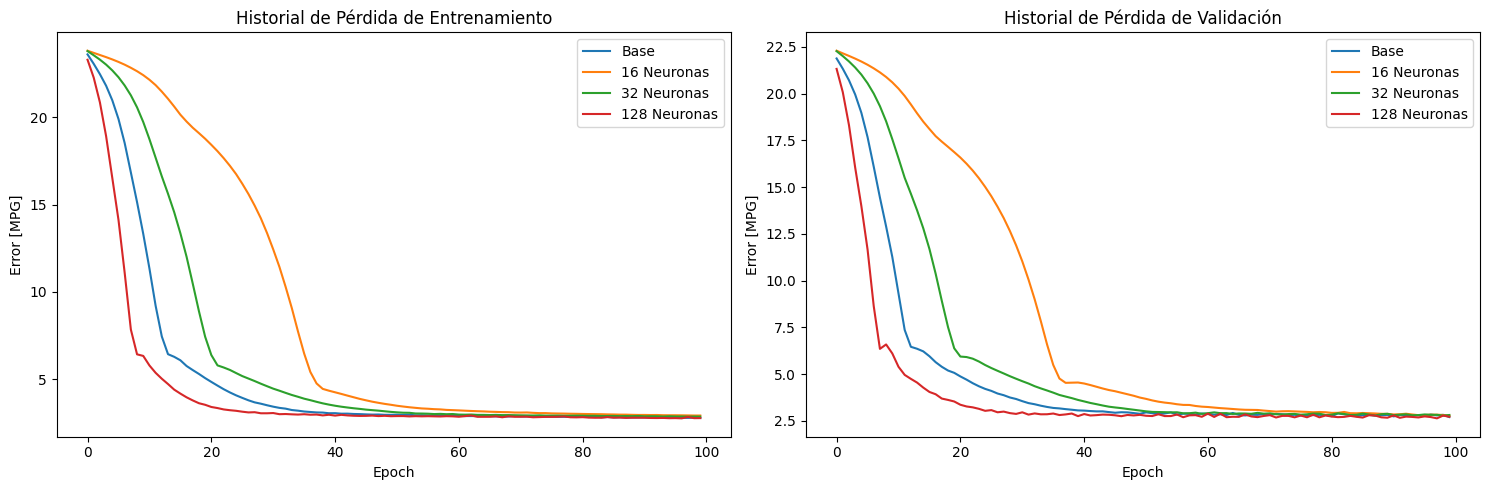

In [64]:
#Entrenamiento
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)

plt.plot(history_Base.history['loss'], label='Base')
plt.plot(history_16_Neuronas.history['loss'], label='16 Neuronas')
plt.plot(history_32_Neuronas.history['loss'], label='32 Neuronas')
plt.plot(history_128_Neuronas.history['loss'], label='128 Neuronas')
plt.xlabel('Epoch')
plt.ylabel('Error [MPG]')
plt.title("Historial de Pérdida de Entrenamiento")
plt.legend()

#Validación
plt.subplot(1,2,2)

plt.plot(history_Base.history['val_loss'], label='Base')
plt.plot(history_16_Neuronas.history['val_loss'], label='16 Neuronas')
plt.plot(history_32_Neuronas.history['val_loss'], label='32 Neuronas')
plt.plot(history_128_Neuronas.history['val_loss'], label='128 Neuronas')
plt.xlabel('Epoch')
plt.ylabel('Error [MPG]')
plt.title("Historial de Pérdida de Validación")
plt.legend()


plt.tight_layout()
plt.savefig("Perdida_Neuronas.png")

## Modelos Distintas Capas

### 1 Capa

In [65]:
modelo_1_Capa = tf.keras.Sequential([
      norm_base,
      tf.keras.layers.Dense(64, activation='relu'),
      tf.keras.layers.Dense(1)
  ])

In [66]:
modelo_1_Capa.compile(loss='mean_absolute_error',
                optimizer=tf.keras.optimizers.Adam(0.001))

In [67]:
modelo_1_Capa.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ normalization (Normalization)   │ (None, 4)              │             9 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 64)             │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 394 (1.54 KB)

 Trainable params: 385 (1.50 KB)

 Non-trainable params: 9 (40.00 B)

In [68]:
%%time
history_1_Capa = modelo_1_Capa.fit(
    train_X[Variables],
    train_y,
    validation_split=0.2,
    epochs=100)

Epoch 1/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 23.9948 - val_loss: 22.3190
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 23.7894 - val_loss: 22.1040
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 23.4133 - val_loss: 21.8912
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 23.1480 - val_loss: 21.6763
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 23.5135 - val_loss: 21.4579
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 22.8958 - val_loss: 21.2350
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 23.0641 - val_loss: 21.0089
Epoch 8/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 22.4323 - val_loss: 20.7712
Epoch 9/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 21.5738 - val_loss: 20.5191
Epoch 10/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 21.9559 - val_loss: 20.2541
Epoch 11/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 21.5620 - val_loss: 19.9753
Epoch 12/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 22.0

In [69]:
test_res['Modelo_1_Capa'] = modelo_1_Capa.evaluate(
    test_X[Variables], test_y,
    verbose=0)

In [70]:
test_res

{'Modelo_Base': 2.6896610260009766,
 'Modelo_16_Neuronas': 2.9003961086273193,
 'Modelo_32_Neuronas': 2.685899019241333,
 'Modelo_128_Neuronas': 2.682385206222534,
 'Modelo_1_Capa': 2.8914196491241455}

### 5 Capas

In [71]:
modelo_5_Capa = tf.keras.Sequential([
      norm_base,
      tf.keras.layers.Dense(64, activation='relu'),
      tf.keras.layers.Dense(64, activation='relu'),
      tf.keras.layers.Dense(64, activation='relu'),
      tf.keras.layers.Dense(64, activation='relu'),
      tf.keras.layers.Dense(64, activation='relu'),
      tf.keras.layers.Dense(1)
  ])

In [72]:
modelo_5_Capa.compile(loss='mean_absolute_error',
                optimizer=tf.keras.optimizers.Adam(0.001))

In [73]:
modelo_5_Capa.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ normalization (Normalization)   │ (None, 4)              │             9 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 64)             │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,034 (66.54 KB)

 Trainable params: 17,025 (66.50 KB)

 Non-trainable params: 9 (40.00 B)

In [74]:
%%time
history_5_Capa = modelo_5_Capa.fit(
    train_X[Variables],
    train_y,
    validation_split=0.2,
    epochs=100)

Epoch 1/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 23.6369 - val_loss: 21.9373
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 22.5272 - val_loss: 20.7664
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 21.9755 - val_loss: 17.7196
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 18.1008 - val_loss: 14.1557
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 13.3421 - val_loss: 9.1639
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 8.2083 - val_loss: 7.6764
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 6.6671 - val_loss: 5.5727
Epoch 8/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 5.8430 - val_loss: 5.4193
Epoch 9/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 5.3618 - val_loss: 4.6494
Epoch 10/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 4.6701 - val_loss: 4.5514
Epoch 11/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 4.3164 - val_loss: 4.2746
Epoch 12/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 4.1248 - val_loss

In [75]:
test_res['Modelo_5_Capa'] = modelo_5_Capa.evaluate(
    test_X[Variables], test_y,
    verbose=0)

In [76]:
test_res

{'Modelo_Base': 2.6896610260009766,
 'Modelo_16_Neuronas': 2.9003961086273193,
 'Modelo_32_Neuronas': 2.685899019241333,
 'Modelo_128_Neuronas': 2.682385206222534,
 'Modelo_1_Capa': 2.8914196491241455,
 'Modelo_5_Capa': 2.8598594665527344}

### 10 Capas

In [77]:
modelo_10_Capa = tf.keras.Sequential([
      norm_base,
      tf.keras.layers.Dense(64, activation='relu'),
      tf.keras.layers.Dense(64, activation='relu'),
      tf.keras.layers.Dense(64, activation='relu'),
      tf.keras.layers.Dense(64, activation='relu'),
      tf.keras.layers.Dense(64, activation='relu'),
      tf.keras.layers.Dense(64, activation='relu'),
      tf.keras.layers.Dense(64, activation='relu'),
      tf.keras.layers.Dense(64, activation='relu'),
      tf.keras.layers.Dense(64, activation='relu'),
      tf.keras.layers.Dense(64, activation='relu'),
      tf.keras.layers.Dense(1)
  ])

In [78]:
modelo_10_Capa.compile(loss='mean_absolute_error',
                optimizer=tf.keras.optimizers.Adam(0.001))

In [79]:
modelo_10_Capa.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ normalization (Normalization)   │ (None, 4)              │             9 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 64)             │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_28 (Dense)                │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_30 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 37,834 (147.79 KB)

 Trainable params: 37,825 (147.75 KB)

 Non-trainable params: 9 (40.00 B)

In [80]:
%%time
history_10_Capa = modelo_10_Capa.fit(
    train_X[Variables],
    train_y,
    validation_split=0.2,
    epochs=100)

Epoch 1/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 24.3032 - val_loss: 21.6102
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 21.7138 - val_loss: 16.2666
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 15.6976 - val_loss: 12.2299
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 10.1503 - val_loss: 6.7324
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 7.1875 - val_loss: 5.4547
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 4.9648 - val_loss: 4.4432
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 4.6095 - val_loss: 4.2126
Epoch 8/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3.7228 - val_loss: 3.6340
Epoch 9/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 3.8153 - val_loss: 3.4449
Epoch 10/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 3.3491 - val_loss: 3.3767
Epoch 11/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 3.3331 - val_loss: 3.0562
Epoch 12/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 3.4584 - val_loss: 

In [81]:
test_res['Modelo_10_Capa'] = modelo_10_Capa.evaluate(
    test_X[Variables], test_y,
    verbose=0)

In [82]:
test_res

{'Modelo_Base': 2.6896610260009766,
 'Modelo_16_Neuronas': 2.9003961086273193,
 'Modelo_32_Neuronas': 2.685899019241333,
 'Modelo_128_Neuronas': 2.682385206222534,
 'Modelo_1_Capa': 2.8914196491241455,
 'Modelo_5_Capa': 2.8598594665527344,
 'Modelo_10_Capa': 2.930361270904541}

### Gráficas

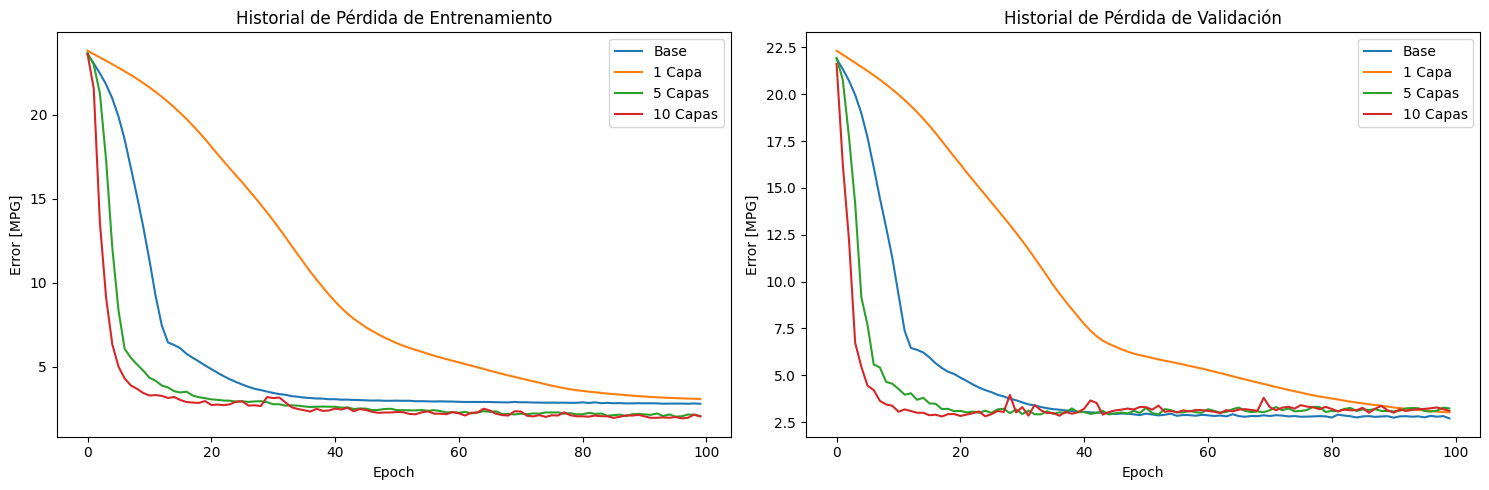

In [83]:
#Entrenamiento
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)

plt.plot(history_Base.history['loss'], label='Base')
plt.plot(history_1_Capa.history['loss'], label='1 Capa')
plt.plot(history_5_Capa.history['loss'], label='5 Capas')
plt.plot(history_10_Capa.history['loss'], label='10 Capas')
plt.xlabel('Epoch')
plt.ylabel('Error [MPG]')
plt.title("Historial de Pérdida de Entrenamiento")
plt.legend()

#Validación
plt.subplot(1,2,2)

plt.plot(history_Base.history['val_loss'], label='Base')
plt.plot(history_1_Capa.history['val_loss'], label='1 Capa')
plt.plot(history_5_Capa.history['val_loss'], label='5 Capas')
plt.plot(history_10_Capa.history['val_loss'], label='10 Capas')
plt.xlabel('Epoch')
plt.ylabel('Error [MPG]')
plt.title("Historial de Pérdida de Validación")
plt.legend()


plt.tight_layout()
plt.savefig("Perdida_Capas.png")

## Modelos Distintas Funciones Activación

### TanH

In [84]:
modelo_TanH = tf.keras.Sequential([
      norm_base,
      tf.keras.layers.Dense(64, activation='tanh'),
      tf.keras.layers.Dense(64, activation='tanh'),
      tf.keras.layers.Dense(1)
  ])

modelo_TanH.compile(loss='mean_absolute_error',
                optimizer=tf.keras.optimizers.Adam(0.001))

In [85]:
modelo_TanH.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ normalization (Normalization)   │ (None, 4)              │             9 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_31 (Dense)                │ (None, 64)             │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_32 (Dense)                │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_33 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,554 (17.79 KB)

 Trainable params: 4,545 (17.75 KB)

 Non-trainable params: 9 (40.00 B)

In [86]:
%%time
history_TanH = modelo_TanH.fit(
    train_X[Variables],
    train_y,
    validation_split=0.2,
    epochs=100)

test_res['Modelo_TanH'] = modelo_TanH.evaluate(
    test_X[Variables], test_y,
    verbose=0)

test_res

Epoch 1/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 24.2493 - val_loss: 22.3863
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 23.4085 - val_loss: 22.2344
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 23.2391 - val_loss: 22.0484
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 23.2761 - val_loss: 21.8191
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 22.5950 - val_loss: 21.5091
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 22.4137 - val_loss: 21.1196
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 21.8545 - val_loss: 20.6256
Epoch 8/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 20.5816 - val_loss: 19.9927
Epoch 9/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 19.8889 - val_loss: 19.2555
Epoch 10/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 18.9596 - val_loss: 18.2084
Epoch 11/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 17.8531 - val_loss: 16.8295
Epoch 12/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 16.7

{'Modelo_Base': 2.6896610260009766,
 'Modelo_16_Neuronas': 2.9003961086273193,
 'Modelo_32_Neuronas': 2.685899019241333,
 'Modelo_128_Neuronas': 2.682385206222534,
 'Modelo_1_Capa': 2.8914196491241455,
 'Modelo_5_Capa': 2.8598594665527344,
 'Modelo_10_Capa': 2.930361270904541,
 'Modelo_TanH': 2.692551851272583}

### Sigmoide

In [87]:
modelo_Sig = tf.keras.Sequential([
      norm_base,
      tf.keras.layers.Dense(64, activation='sigmoid'),
      tf.keras.layers.Dense(64, activation='sigmoid'),
      tf.keras.layers.Dense(1)
  ])

modelo_Sig.compile(loss='mean_absolute_error',
                optimizer=tf.keras.optimizers.Adam(0.001))

In [88]:
modelo_Sig.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ normalization (Normalization)   │ (None, 4)              │             9 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_34 (Dense)                │ (None, 64)             │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_35 (Dense)                │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_36 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,554 (17.79 KB)

 Trainable params: 4,545 (17.75 KB)

 Non-trainable params: 9 (40.00 B)

In [89]:
%%time
history_Sig = modelo_Sig.fit(
    train_X[Variables],
    train_y,
    validation_split=0.2,
    epochs=100)

test_res['Modelo_Sig'] = modelo_Sig.evaluate(
    test_X[Variables], test_y,
    verbose=0)

test_res

Epoch 1/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 23.3526 - val_loss: 21.2161
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 22.1651 - val_loss: 20.4396
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 21.7840 - val_loss: 19.6836
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 21.1756 - val_loss: 18.9569
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 19.7207 - val_loss: 18.2648
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 19.3023 - val_loss: 17.6103
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 18.8410 - val_loss: 16.9928
Epoch 8/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 18.1170 - val_loss: 16.4094
Epoch 9/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 16.8627 - val_loss: 15.8552
Epoch 10/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 17.8126 - val_loss: 15.3262
Epoch 11/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 16.5712 - val_loss: 14.8172
Epoch 12/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 16.

{'Modelo_Base': 2.6896610260009766,
 'Modelo_16_Neuronas': 2.9003961086273193,
 'Modelo_32_Neuronas': 2.685899019241333,
 'Modelo_128_Neuronas': 2.682385206222534,
 'Modelo_1_Capa': 2.8914196491241455,
 'Modelo_5_Capa': 2.8598594665527344,
 'Modelo_10_Capa': 2.930361270904541,
 'Modelo_TanH': 2.692551851272583,
 'Modelo_Sig': 3.2110981941223145}

### Softmax

In [90]:
modelo_Soft = tf.keras.Sequential([
      norm_base,
      tf.keras.layers.Dense(64, activation='softmax'),
      tf.keras.layers.Dense(64, activation='softmax'),
      tf.keras.layers.Dense(1)
  ])

modelo_Soft.compile(loss='mean_absolute_error',
                optimizer=tf.keras.optimizers.Adam(0.001))

In [91]:
modelo_Soft.summary()

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ normalization (Normalization)   │ (None, 4)              │             9 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_37 (Dense)                │ (None, 64)             │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_38 (Dense)                │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_39 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,554 (17.79 KB)

 Trainable params: 4,545 (17.75 KB)

 Non-trainable params: 9 (40.00 B)

In [92]:
%%time
history_Soft = modelo_Soft.fit(
    train_X[Variables],
    train_y,
    validation_split=0.2,
    epochs=100)

test_res['Modelo_Soft'] = modelo_Soft.evaluate(
    test_X[Variables], test_y,
    verbose=0)

test_res

Epoch 1/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 24.0598 - val_loss: 22.4843
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 23.8658 - val_loss: 22.4661
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 24.1250 - val_loss: 22.4479
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 23.9931 - val_loss: 22.4296
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 23.7090 - val_loss: 22.4113
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 23.4015 - val_loss: 22.3931
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 23.9534 - val_loss: 22.3748
Epoch 8/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 23.6203 - val_loss: 22.3565
Epoch 9/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 23.6672 - val_loss: 22.3382
Epoch 10/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 23.3991 - val_loss: 22.3199
Epoch 11/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 23.3581 - val_loss: 22.3015
Epoch 12/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 23.

{'Modelo_Base': 2.6896610260009766,
 'Modelo_16_Neuronas': 2.9003961086273193,
 'Modelo_32_Neuronas': 2.685899019241333,
 'Modelo_128_Neuronas': 2.682385206222534,
 'Modelo_1_Capa': 2.8914196491241455,
 'Modelo_5_Capa': 2.8598594665527344,
 'Modelo_10_Capa': 2.930361270904541,
 'Modelo_TanH': 2.692551851272583,
 'Modelo_Sig': 3.2110981941223145,
 'Modelo_Soft': 20.91733169555664}

### Gráficas

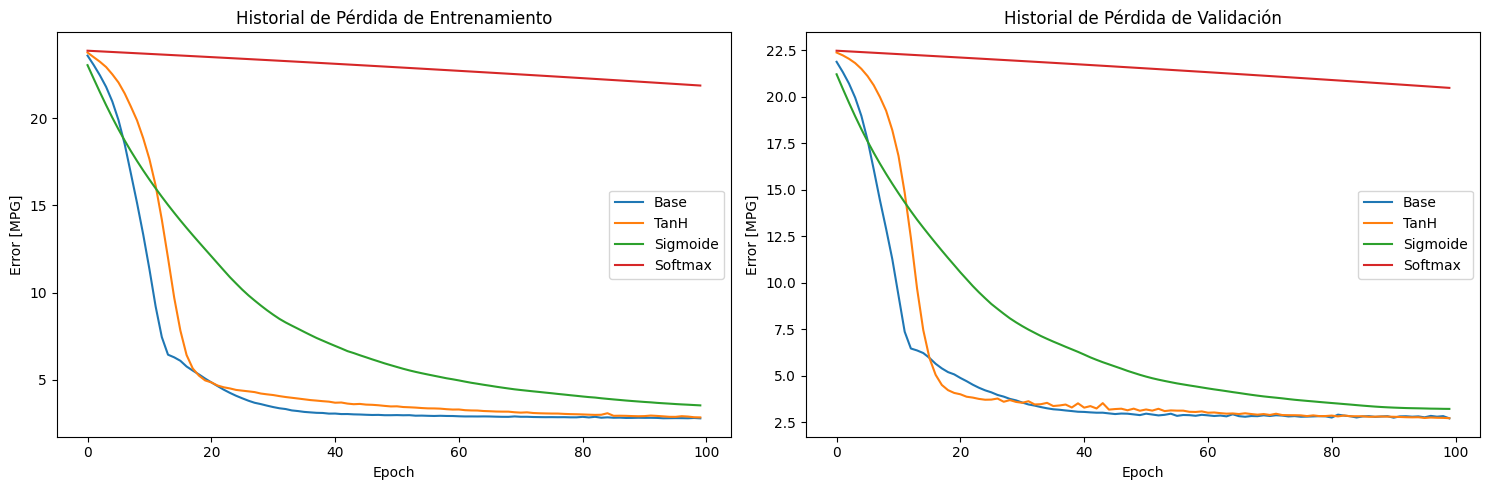

In [93]:
#Entrenamiento
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)

plt.plot(history_Base.history['loss'], label='Base')
plt.plot(history_TanH.history['loss'], label='TanH')
plt.plot(history_Sig.history['loss'], label='Sigmoide')
plt.plot(history_Soft.history['loss'], label='Softmax')
plt.xlabel('Epoch')
plt.ylabel('Error [MPG]')
plt.title("Historial de Pérdida de Entrenamiento")
plt.legend()

#Validación
plt.subplot(1,2,2)

plt.plot(history_Base.history['val_loss'], label='Base')
plt.plot(history_TanH.history['val_loss'], label='TanH')
plt.plot(history_Sig.history['val_loss'], label='Sigmoide')
plt.plot(history_Soft.history['val_loss'], label='Softmax')
plt.xlabel('Epoch')
plt.ylabel('Error [MPG]')
plt.title("Historial de Pérdida de Validación")
plt.legend()


plt.tight_layout()
plt.savefig("Perdida_Funcion.png")